In [1]:
# Pip install big query for pulling publically available data via python
pip install google-cloud-bigquery

SyntaxError: invalid syntax (<ipython-input-1-d9aa5c1dc6d4>, line 2)

In [ ]:
# Install a needed dependency for the .to_dataframe() function 
pip install pyarrow

In [4]:
# Using for the NYBikeShare data. Needing to get the zipcodes from this database to match zipcodes with NYSurvey data for comparison.
pip install geopy

  Using cached geopy-2.2.0-py3-none-any.whl (118 kB)
  Using cached geographiclib-1.52-py3-none-any.whl (38 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# only import bigquery from google cloud
from google.cloud import bigquery
import numpy as np
import pandas as pd
import seaborn as sns
from geopy.geocoders import Nominatim

In [6]:
# Changing the settings to override this file path in the environment
import os

# Needing to have the key file downloaded to access via the api. The query can be used
# instead and utilized for this brief analysis.
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/tiareina/Downloads/compact-scene-317315-b4b3cd5c140c.json"

In [7]:
# Construct a BigQuery client object.
client = bigquery.Client()

query = """
    SELECT usertype, count(*) as RideCount
    FROM `bigquery-public-data.new_york_citibike.citibike_trips`
    GROUP BY usertype
"""
query_job = client.query(query)  # Make an API request.

In [8]:
# collect results as a dataframe
df = query_job.to_dataframe()
df.usertype = df.usertype.dropna()
df.RideCount = df.RideCount.astype(int)
df.sort_values(by='RideCount').head()

,usertype,RideCount
2,,5828994
1,Customer,6191149
0,Subscriber,46917572


In [9]:
# Construct a BigQuery client object.
client = bigquery.Client()

query2 = """
    SELECT usertype,AVG(tripduration) as Average_Ride_Time
    FROM `bigquery-public-data.new_york_citibike.citibike_trips`
    GROUP BY usertype
"""
query_job2 = client.query(query2)  # Make an API request.

In [10]:
# collect results as a dataframe
df2 = query_job2.to_dataframe()
df2 = df2[df2['usertype']!='']

#Calculates the average ride time in minutes instead of seconds
df2['Avg_RT_Min'] = df2['Average_Ride_Time'] / 60

In [11]:
df2

,usertype,Average_Ride_Time,Avg_RT_Min
0,Subscriber,806.381888,13.439698
1,Customer,2145.512075,35.758535


In [12]:
# Construct a BigQuery client object.
client = bigquery.Client()

query3 = """
    SELECT usertype,
    start_station_id,
    end_station_id,
    count(*) AS Count_of_Trips
    FROM `bigquery-public-data.new_york_citibike.citibike_trips`
    WHERE stoptime > DATE('2017-01-01')
    GROUP BY usertype, start_station_id, end_station_id
    ORDER BY Count_of_Trips desc;
"""
query_job3 = client.query(query3)  # Make an API request.

In [13]:
# collect results as a dataframe
df3 = query_job3.to_dataframe()

In [14]:
df3

,usertype,start_station_id,end_station_id,Count_of_Trips
0,Subscriber,432,3263,9614
1,Customer,2006,3282,6783
2,Customer,2006,2006,6662
3,Customer,281,281,5805
4,Subscriber,435,509,5666
...,...,...,...,...
504631,Customer,3125,382,1
504632,Subscriber,3476,382,1
504633,Customer,3232,151,1
504634,Subscriber,3221,151,1


In [15]:
# Using the same dataframe for 

In [16]:
# Construct a BigQuery client object.
client = bigquery.Client()

query4 = """
    SELECT usertype,
    start_station_id,
    end_station_id,
    count(*) AS Count_of_Trips
    FROM `bigquery-public-data.new_york_citibike.citibike_trips`
    WHERE stoptime > DATE('2017-01-01')
    GROUP BY usertype, start_station_id, end_station_id
    ORDER BY Count_of_Trips desc;
"""
query_job4 = client.query(query4)  # Make an API request.

In [17]:
import pandas as pd

In [18]:
NYSurvey = pd.read_csv('Citywide_Mobility_Survey_-_Main_Survey_2017.csv')

/Users/tiareina/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
#list(NYSurvey.columns)

In [20]:
#[i for i in NYSurvey.columns if 'BIKE' in i or "bike" in i]

In [21]:
relCols = [
 'UniqueID',
 'StartTime_EST',
 'FinishTime_EST',
 'qgender',
 'qzipcmb',
 'qbikeown',
 'qbikemany',
 'qBIKETYPE1',
 'qBIKETYPE2',
 'qBIKETYPE3',
 'qBIKETYPE4',
 'qBIKETYPE5',
 'qBIKETYPE_other3',
 'qBIKESTORE1',
 'qBIKESTORE2',
 'qBIKESTORE3',
 'qBIKESTORE4',
 'qBIKESTORE5',
 'qBIKESTORE6',
 'qBIKESTORE7',
 'qBIKESTORE8',
 'qBIKESTORE9',
 'qBIKESTORE_other7',
 'qbikeride',
 'qbiketo',
 'qbikedays',
 'qcitibike',
 'qcitibikefreq',
 'qNOCITIBIKE1',
 'qNOCITIBIKE2',
 'qNOCITIBIKE3',
 'qNOCITIBIKE4',
 'qNOCITIBIKE5',
 'qNOCITIBIKE6',
 'qNOCITIBIKE7',
 'qNOCITIBIKE8',
 'qNOCITIBIKE9',
 'qNOCITIBIKE_other7'
]

In [22]:
nyBikeDF = NYSurvey[relCols]

In [23]:
surveyBikeAvgs = nyBikeDF.groupby('qzipcmb')[['qbikeown','qbikeride']].agg(np.average)
#surveyBikeAvgs = surveyBikeAvgs[surveyBikeAvgs['']]

<AxesSubplot:xlabel='qzipcmb', ylabel='qbikeown'>

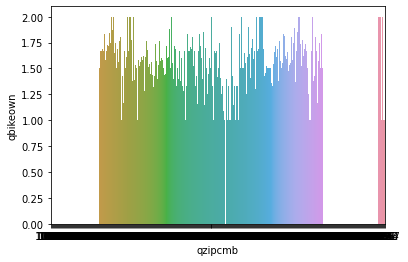

In [24]:
sns.barplot(y='qbikeown', x=surveyBikeAvgs.index, data=surveyBikeAvgs)

In [26]:
def spaceReplacer(data):
    if data == " ":
        return np. NaN
    else:
        return data

In [27]:
nyBikeDF['qcitibikefreq'] = nyBikeDF['qcitibikefreq'].apply(spaceReplacer).astype(float)

<ipython-input-27-a1d1909f563b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyBikeDF['qcitibikefreq'] = nyBikeDF['qcitibikefreq'].apply(spaceReplacer).astype(float)


In [37]:
nyBikeDF[['qcitibike','qcitibikefreq']]

,qcitibike,qcitibikefreq
0,2.0,NaN
1,2.0,NaN
2,2.0,NaN
3,2.0,NaN
4,2.0,NaN
...,...,...
3598,1.0,1.0
3599,2.0,NaN
3600,2.0,NaN
3601,2.0,NaN


In [28]:
nyBikeDF[nyBikeDF['qcitibike'] >=1.0]

,UniqueID,StartTime_EST,FinishTime_EST,qgender,qzipcmb,qbikeown,qbikemany,qBIKETYPE1,qBIKETYPE2,qBIKETYPE3,...,qNOCITIBIKE1,qNOCITIBIKE2,qNOCITIBIKE3,qNOCITIBIKE4,qNOCITIBIKE5,qNOCITIBIKE6,qNOCITIBIKE7,qNOCITIBIKE8,qNOCITIBIKE9,qNOCITIBIKE_other7
0,110000001.0,05/13/2017,,2.0,10023,2.0,0,,,,...,0,0,0,1,0,0,0,0,0,
1,110000002.0,05/13/2017,,2.0,10016,2.0,0,,,,...,0,0,0,0,1,0,0,0,0,
2,110000008.0,05/13/2017,,2.0,11421,1.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,
3,110000009.0,05/13/2017,,2.0,10467,2.0,0,,,,...,0,1,0,0,0,0,0,0,0,
4,110000010.0,05/13/2017,,2.0,11218,1.0,2,1,0,0,...,0,1,0,0,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,200013652.0,06/30/2017,6/30/2017,2.0,10459,2.0,,,,,...,0,0,0,0,0,0,0,1,0,
3598,200013657.0,06/30/2017,6/30/2017,1.0,10031,1.0,4,1,1,0,...,,,,,,,,,,
3599,200013667.0,06/30/2017,6/30/2017,1.0,11377,2.0,,,,,...,0,1,0,0,0,0,0,0,0,
3600,200013670.0,06/30/2017,6/30/2017,1.0,11374,2.0,,,,,...,1,0,0,0,0,0,0,0,0,


In [54]:
nyBikeDF[nyBikeDF['qcitibike']==1.0]

,UniqueID,StartTime_EST,FinishTime_EST,qgender,qzipcmb,qbikeown,qbikemany,qBIKETYPE1,qBIKETYPE2,qBIKETYPE3,...,qNOCITIBIKE1,qNOCITIBIKE2,qNOCITIBIKE3,qNOCITIBIKE4,qNOCITIBIKE5,qNOCITIBIKE6,qNOCITIBIKE7,qNOCITIBIKE8,qNOCITIBIKE9,qNOCITIBIKE_other7
61,110000136.0,05/20/2017,,2.0,11230,1.0,4,1,0,0,...,,,,,,,,,,
65,110000141.0,05/20/2017,,1.0,11215,1.0,2,1,0,0,...,,,,,,,,,,
84,110000200.0,05/21/2017,,2.0,10025,1.0,3,1,0,0,...,,,,,,,,,,
89,110000214.0,05/21/2017,,2.0,10002,2.0,0,,,,...,,,,,,,,,,
166,110000475.0,05/24/2017,,2.0,10012,1.0,3,1,0,0,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,200013134.0,06/29/2017,6/29/2017,1.0,10461,2.0,,,,,...,,,,,,,,,,
3566,200013138.0,06/29/2017,6/29/2017,2.0,11373,1.0,4,1,0,0,...,,,,,,,,,,
3568,200013147.0,06/29/2017,6/29/2017,1.0,10467,1.0,1,0,1,0,...,,,,,,,,,,
3588,200013473.0,06/30/2017,6/30/2017,2.0,10453,2.0,,,,,...,,,,,,,,,,


## Connecting NY Lat, Long to the zips

In [29]:
query5 = """
    SELECT  *
    FROM `bigquery-public-data.new_york_citibike.citibike_trips` 
    WHERE starttime > date('2017-01-01T00:00:00')
    LIMIT 10
"""
query_job2 = client.query(query5)  # Make an API request.

In [30]:
nytrips = query_job2.to_dataframe().copy()

In [31]:
nytrips[['start_station_latitude','start_station_longitude']]

,start_station_latitude,start_station_longitude
0,40.784727,-73.969617
1,40.727064,-73.996621
2,40.695128,-73.995951
3,40.708531,-73.964090
4,40.690081,-73.947915
5,40.777057,-73.978985
6,40.763094,-73.978350
7,40.722174,-73.983688
8,40.661063,-73.979453
9,40.731437,-73.994903


In [38]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="NYBikeShare Mapping")

NYZipCodes = []

for i in nytrips[['start_station_latitude','start_station_longitude']].values:
    location = geolocator.reverse(i)
    NYZipCodes.append([i, location.address.split(',')[-2]])

In [48]:
# Some entries won't have a zip code the way they are entered into the database. I don't know how we'd want to handle that if we want to use this method
# Which would be extract the long, lat from BQ, and 
pd.DataFrame(NYZipCodes,nytrips).reset_index().drop('index',axis=1)

,0,1
0,"[40.78472675, -73.96961715]",10024
1,"[40.72706363348306, -73.99662137031554]",10003
2,"[40.69512845, -73.99595065]",11201
3,"[40.70853074, -73.96408963]",11249
4,"[40.6900815, -73.947915]",11216
5,"[40.7770575, -73.97898475]",10025
6,"[40.76309387270797, -73.9783501625061]",New York
7,"[40.72217444, -73.98368779]",10009
8,"[40.6610633719006, -73.97945255041122]",11215
9,"[40.73143724085228, -73.99490341544151]",10003


## Simple Viz